## Imports

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
import string

## Data Analysis

  lan_code                sentence
0      cmn                  我們試試看！
1      cmn                 我该去睡觉了。
2      cmn                 你在干什麼啊？
3      cmn                  這是什麼啊？
4      cmn  今天是６月１８号，也是Muiriel的生日！
    lan_code  frequency
0        eng    1586621
1        rus     909951
2        ita     805104
3        tur     717897
4        epo     685643
..       ...        ...
399      hax          1
400      rel          1
401      lou          1
402      nys          1
403      cyo          1

[404 rows x 2 columns]


C:\Users\valer\AppData\Local\Temp\ipykernel_31068\2213813112.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=language_df, x='lan_code', y='frequency', palette='viridis')


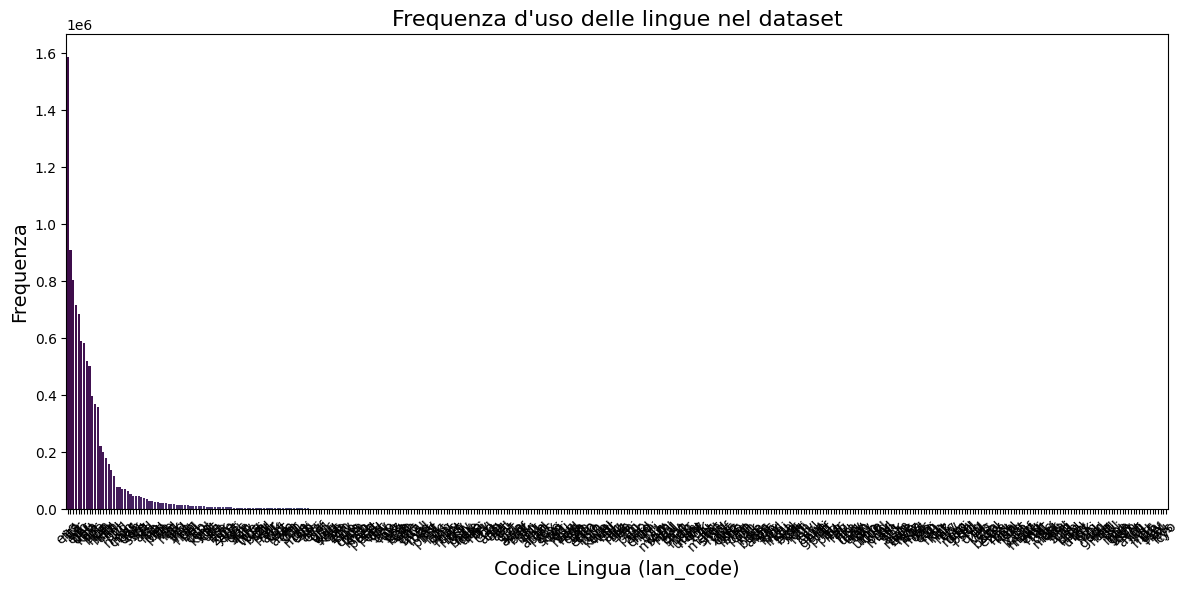

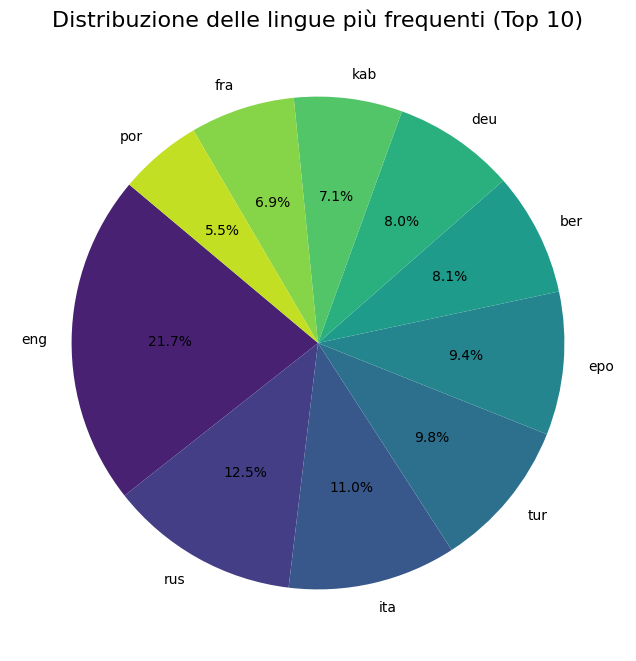

In [2]:
# Caricare il dataset
file_path = 'data/sentences.csv'  # Sostituisci con il percorso del tuo file CSV
data = pd.read_csv(file_path, usecols=['lan_code', 'sentence'])

# Controllare i primi dati del dataset
print(data.head())

# Calcolare la frequenza di utilizzo delle lingue
language_counts = data['lan_code'].value_counts()

# Creare un dataframe per una migliore visualizzazione
language_df = language_counts.reset_index()
language_df.columns = ['lan_code', 'frequency']

# Stampare le statistiche principali
print(language_df)

# Visualizzare il grafico a barre della frequenza delle lingue
plt.figure(figsize=(12, 6))
sns.barplot(data=language_df, x='lan_code', y='frequency', palette='viridis')
plt.xticks(rotation=45)
plt.title('Frequenza d\'uso delle lingue nel dataset', fontsize=16)
plt.xlabel('Codice Lingua (lan_code)', fontsize=14)
plt.ylabel('Frequenza', fontsize=14)
plt.tight_layout()
plt.show()

# (Opzionale) Visualizzare un grafico a torta per le lingue più usate
top_languages = language_df.head(10)  # Primi 10 codici lingua più frequenti
plt.figure(figsize=(8, 8))
plt.pie(top_languages['frequency'], labels=top_languages['lan_code'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_languages)))
plt.title('Distribuzione delle lingue più frequenti (Top 10)', fontsize=16)
plt.show()

Nuovo file CSV salvato in: data/filtered_language_detection.csv
Dimensione del nuovo dataset: 10041510 righe (su 10301850 totali).
  lan_code                sentence
0      cmn                  我們試試看！
1      cmn                 我该去睡觉了。
2      cmn                 你在干什麼啊？
3      cmn                  這是什麼啊？
4      cmn  今天是６月１８号，也是Muiriel的生日！
   lan_code  frequency
0       eng    1586621
1       rus     909951
2       ita     805104
3       tur     717897
4       epo     685643
5       ber     591222
6       deu     584674
7       kab     518328
8       fra     501241
9       por     398029
10      spa     369841
11      hun     357828
12      jpn     220103
13      heb     199203
14      ukr     178269
15      nld     159193
16      fin     139089
17      pol     116582
18      mkd      77949
19      lit      76149
20      cmn      72439
21      mar      69303
22      ces      63880
23      dan      54945
24      tok      47203
25      swe      47006
26      srp      45199
27      lat    

C:\Users\valer\AppData\Local\Temp\ipykernel_31068\1323358416.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=language_df, x='lan_code', y='frequency', palette='viridis')


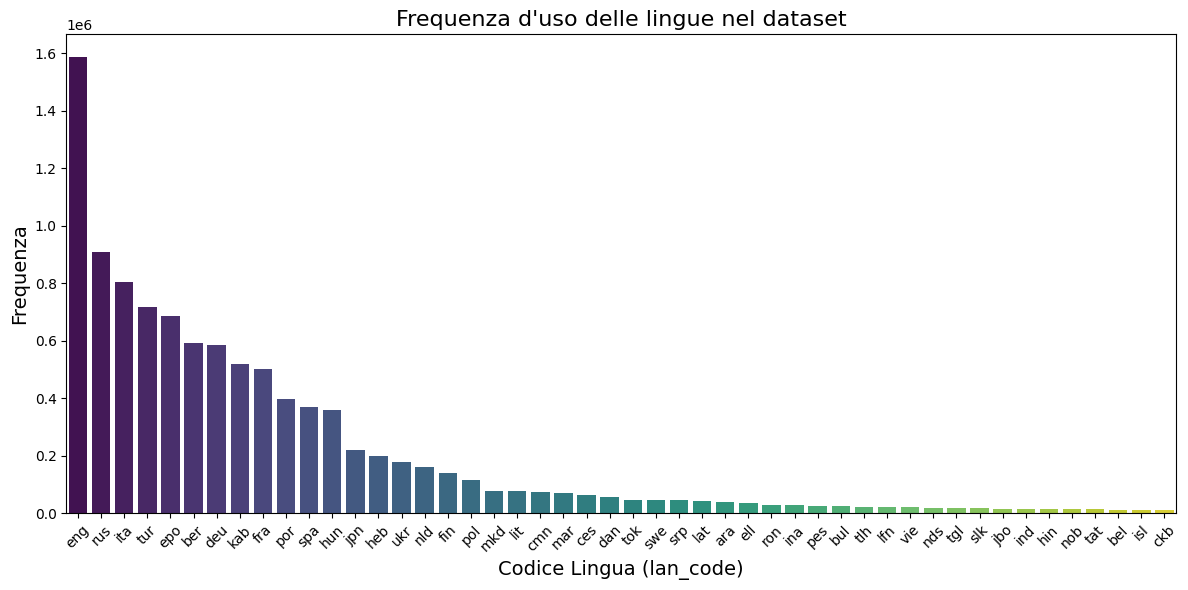

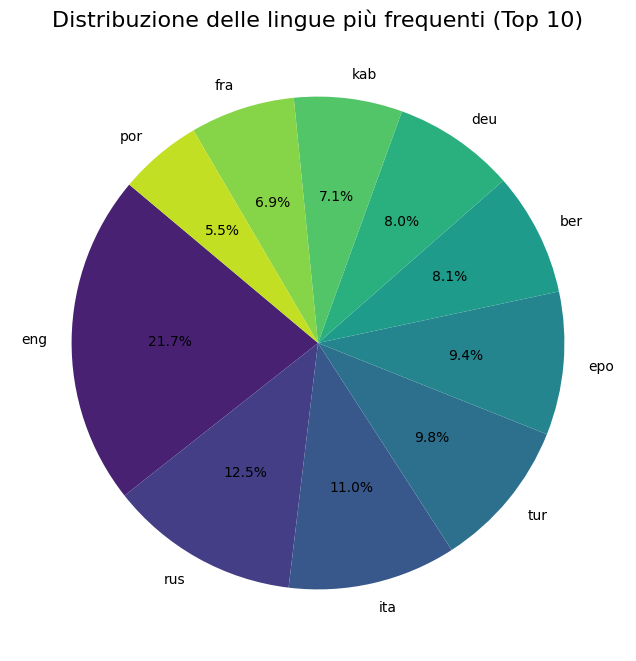

In [7]:
# Calcolare il totale delle righe
total_rows = len(data)

# Calcolare la frequenza delle lingue
language_counts = data['lan_code'].value_counts()

# Filtrare i codici lingua con frequenza >= 0.01% del totale
threshold = 0.001 * total_rows  # 0.01% del totale
valid_languages = language_counts[language_counts >= threshold].index

# Filtrare il dataset mantenendo solo le righe con i codici lingua validi
filtered_data = data[data['lan_code'].isin(valid_languages)]

# Salvare il nuovo dataset in un file CSV
output_path = 'data/filtered_language_detection.csv'  # Sostituisci con il nome desiderato per il file
filtered_data.to_csv(output_path, index=False)

print(f"Nuovo file CSV salvato in: {output_path}")
print(f"Dimensione del nuovo dataset: {len(filtered_data)} righe (su {total_rows} totali).")

file_path = 'data/filtered_language_detection.csv'  # Sostituisci con il percorso del tuo file CSV
data = pd.read_csv(file_path, usecols=['lan_code', 'sentence'])

# Controllare i primi dati del dataset
print(data.head())

# Calcolare la frequenza di utilizzo delle lingue
language_counts = data['lan_code'].value_counts()

# Creare un dataframe per una migliore visualizzazione
language_df = language_counts.reset_index()
language_df.columns = ['lan_code', 'frequency']

# Stampare le statistiche principali
print(language_df)

# Visualizzare il grafico a barre della frequenza delle lingue
plt.figure(figsize=(12, 6))
sns.barplot(data=language_df, x='lan_code', y='frequency', palette='viridis')
plt.xticks(rotation=45)
plt.title('Frequenza d\'uso delle lingue nel dataset', fontsize=16)
plt.xlabel('Codice Lingua (lan_code)', fontsize=14)
plt.ylabel('Frequenza', fontsize=14)
plt.tight_layout()
plt.show()

# (Opzionale) Visualizzare un grafico a torta per le lingue più usate
top_languages = language_df.head(10)  # Primi 10 codici lingua più frequenti
plt.figure(figsize=(8, 8))
plt.pie(top_languages['frequency'], labels=top_languages['lan_code'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_languages)))
plt.title('Distribuzione delle lingue più frequenti (Top 10)', fontsize=16)
plt.show()

In [8]:
# Funzione per estrarre termini unici da una frase
def get_unique_terms(sentence):
    # Tokenizzazione semplice basata sugli spazi, rimozione di punteggiatura e conversione a minuscolo
    if isinstance(sentence, str):
        words = sentence.lower().split()
        return set(words)
    return set()

# Creare un dizionario per conteggiare i termini unici per lingua
unique_terms_per_language = {}

# Iterare per ogni lingua e accumulare termini unici
for lan_code, group in data.groupby('lan_code'):
    all_terms = set()
    for sentence in group['sentence']:
        all_terms.update(get_unique_terms(sentence))
    unique_terms_per_language[lan_code] = len(all_terms)

# Creare un DataFrame per visualizzare i risultati
unique_terms_df = pd.DataFrame(list(unique_terms_per_language.items()), columns=['lan_code', 'unique_terms'])

# Ordinare il DataFrame per numero di termini unici in ordine decrescente
unique_terms_df = unique_terms_df.sort_values(by='unique_terms', ascending=False)

# Stampare le statistiche principali
print(unique_terms_df)

# Salvare i risultati in un file CSV
output_path = 'data/unique_terms_per_language.csv'
unique_terms_df.to_csv(output_path, index=False)

print(f"Risultati salvati in: {output_path}")

   lan_code  unique_terms
36      rus        255924
11      epo        247182
22      jpn        220719
16      hun        214852
45      tur        211054
23      kab        203891
2       ber        201578
8       deu        197008
10      eng        170993
38      spa        128056
13      fra        125321
34      por        121962
20      ita        121699
12      fin        101601
14      heb         99955
6       cmn         76048
33      pol         75483
46      ukr         71530
30      nld         56689
26      lit         52097
39      srp         46588
24      lat         44511
4       ces         44506
0       ara         44422
28      mkd         41441
7       dan         31889
41      tat         29627
27      mar         27588
40      swe         26363
17      ina         25991
35      ron         23956
1       bel         23463
9       ell         23407
3       bul         21865
32      pes         21423
43      tlh         21217
25      lfn         20317
42      tgl 

  lan_code  unique_terms
0      rus        255924
1      epo        247182
2      jpn        220719
3      hun        214852
4      tur        211054


C:\Users\valer\AppData\Local\Temp\ipykernel_31068\2815884818.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unique_terms_df, x='lan_code', y='unique_terms', palette='viridis')


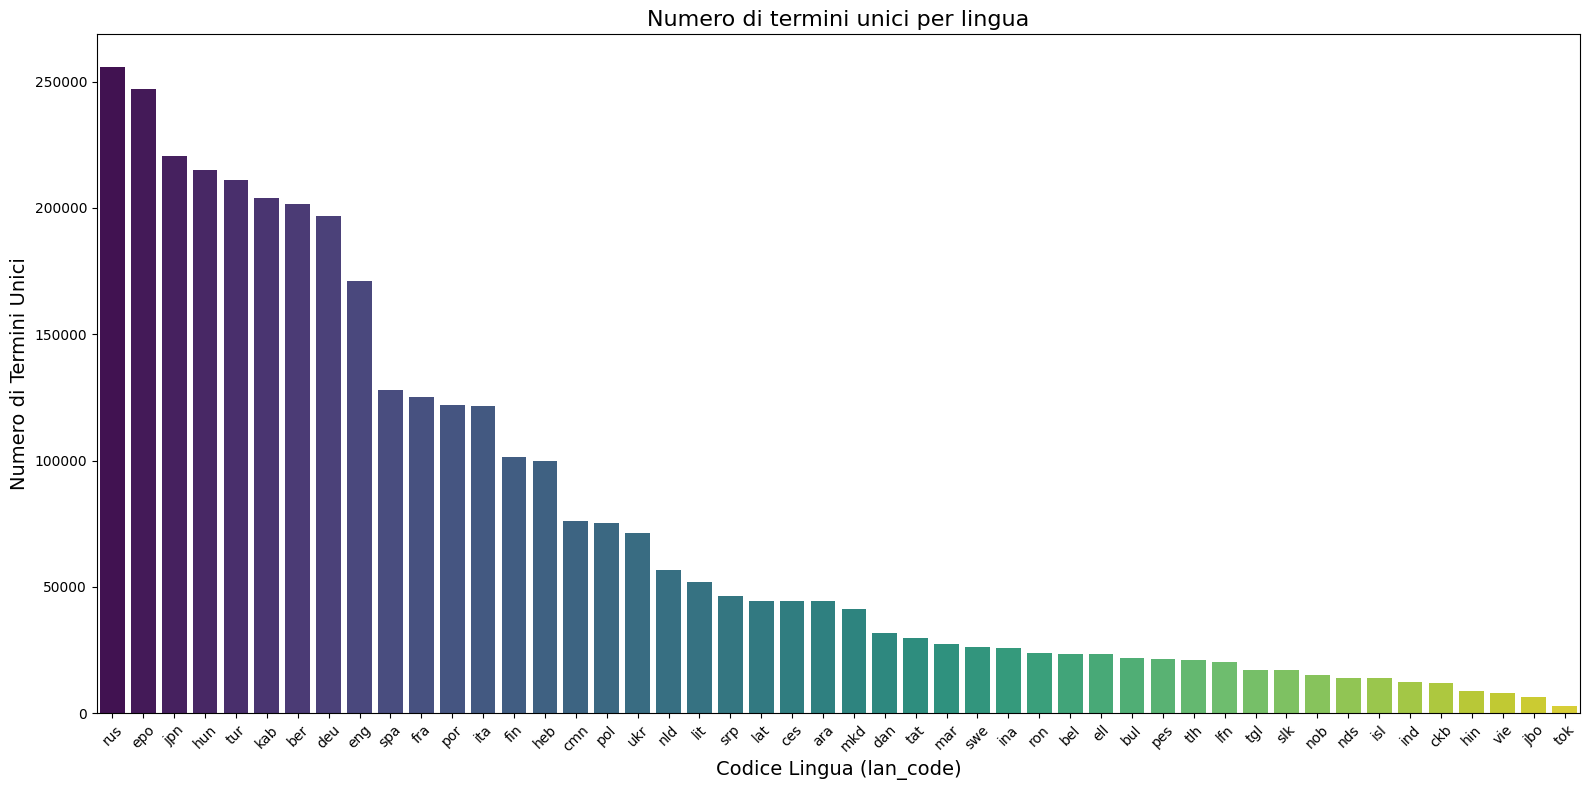

In [9]:
input_path = 'data/unique_terms_per_language.csv'
unique_terms_df = pd.read_csv(input_path)

# Visualizzare i primi risultati
print(unique_terms_df.head())

# Creare il grafico a barre
plt.figure(figsize=(16, 8))
sns.barplot(data=unique_terms_df, x='lan_code', y='unique_terms', palette='viridis')
plt.xticks(rotation=45, fontsize=10)
plt.title('Numero di termini unici per lingua', fontsize=16)
plt.xlabel('Codice Lingua (lan_code)', fontsize=14)
plt.ylabel('Numero di Termini Unici', fontsize=14)
plt.tight_layout()
plt.show()

## TF-IDF

In [ ]:
# Caricare il dataset filtrato
file_path = 'data/filtered_language_detection.csv'
data = pd.read_csv(file_path)

# Concatenare tutte le frasi per ogni lingua
language_sentences = data.groupby('lan_code')['sentence'].apply(lambda x: ' '.join(x)).reset_index()

# Calcolare il TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000 , lowercase=True)  # Puoi personalizzare max_features
tfidf_matrix = tfidf_vectorizer.fit_transform(language_sentences['sentence'])

# Convertire il risultato in un DataFrame per una migliore visualizzazione
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=language_sentences['lan_code'], columns=tfidf_vectorizer.get_feature_names_out())

# Visualizzare i primi risultati
print(tfidf_df.head())

# Salvare il TF-IDF in un file CSV
output_path = 'data/tfidf_language_analysis.csv'
tfidf_df.to_csv(output_path)

print(f"TF-IDF salvato in: {output_path}")

                00       000      0000  000000000000001  00000000005  \
lan_code                                                               
ara       0.000000  0.000311  0.000000              0.0          0.0   
bel       0.000460  0.000304  0.000000              0.0          0.0   
ber       0.000594  0.000085  0.000000              0.0          0.0   
bul       0.000335  0.000406  0.000097              0.0          0.0   
ces       0.000030  0.000132  0.000000              0.0          0.0   

          00000001  0000045  0001  000ena  000m  ...   𝑐𝐵  𝑖ℎ𝑟𝑒𝑚   𝑘𝑥   𝑚𝑏  \
lan_code                                         ...                         
ara            0.0      0.0   0.0     0.0   0.0  ...  0.0    0.0  0.0  0.0   
bel            0.0      0.0   0.0     0.0   0.0  ...  0.0    0.0  0.0  0.0   
ber            0.0      0.0   0.0     0.0   0.0  ...  0.0    0.0  0.0  0.0   
bul            0.0      0.0   0.0     0.0   0.0  ...  0.0    0.0  0.0  0.0   
ces            0.0      0.0

In [ ]:
nltk.download('stopwords')

# Caricare il dataset filtrato
file_path = 'data/filtered_language_detection.csv'
data = pd.read_csv(file_path)

# Funzione per rimuovere stop words e punteggiatura
def remove_stopwords(sentence, language):
    try:
        stop_words = set(stopwords.words(language))  # Ottieni stop words per la lingua specifica
    except:
        stop_words = set()  # Se la lingua non è supportata, nessuna stop word viene usata
    # Tokenizzazione semplice e rimozione di stop words e punteggiatura
    tokens = sentence.lower().translate(str.maketrans('', '', string.punctuation)).split()
    return ' '.join([word for word in tokens if word not in stop_words])

# Aggiungere un mapping tra codici lingua e le lingue supportate da NLTK
language_mapping = {
    'eng': 'english',
    'ita': 'italian',
    'fra': 'french',
    'spa': 'spanish',
    'deu': 'german',
    'ara': 'arabic',
    'aze': 'azerbaijani',
    'tur': 'turkish',
    'dan': 'danish',
    'fin': 'finnish',
    'ell': 'greek',
    'hun': 'hungarian',
    'ind': 'indonesian',
    'kaz': 'kazakh',
    'npi': 'nepali',
    'nob': 'norwegian',
    'rom': 'romanian',
    'por': 'portuguese',
    'rus': 'russian',
    'slv': 'slovene',
    'swe': 'swedish',
    'tgk': 'tajik'
}

# Applicare la rimozione delle stop words per ogni frase
data['cleaned_sentence'] = data.apply(
    lambda row: remove_stopwords(row['sentence'], language_mapping.get(row['lan_code'], 'english')),
    axis=1
)

# Concatenare tutte le frasi per ogni lingua
language_sentences = data.groupby('lan_code')['cleaned_sentence'].apply(lambda x: ' '.join(x)).reset_index()

# Calcolare il TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000, lowercase=True)  # Personalizza max_features se necessario
tfidf_matrix = tfidf_vectorizer.fit_transform(language_sentences['cleaned_sentence'])

# Convertire il risultato in un DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=language_sentences['lan_code'], columns=tfidf_vectorizer.get_feature_names_out())

# Salvare i risultati in un file CSV
output_path = 'data/tfidf_language_analysis_with_stopwords_removal.csv'
tfidf_df.to_csv(output_path)

print(f"TF-IDF con rimozione stop words salvato in: {output_path}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\valer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
